# Support Vector Machine (SVM)

## Linear

In [2]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils.utils import plot_decision_boundary

In [7]:
np.random.seed(1)

In [3]:
# data
# data import
data = load_iris()
X, y = data.data[:, [2, 3]], data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
# standarize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# whole standarize data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

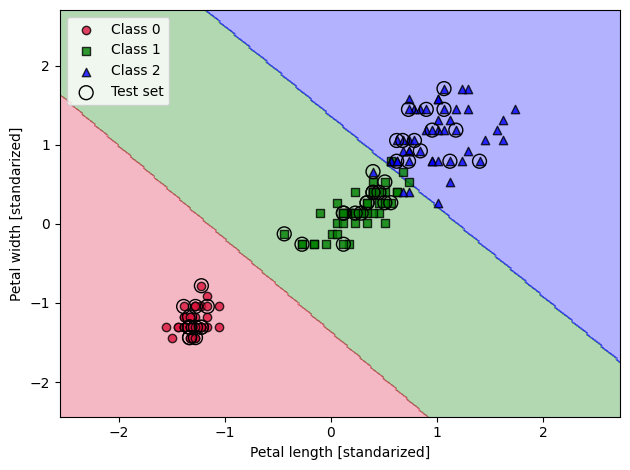

In [5]:
# model
svm = SVC(
    C=1.0,
    kernel='linear',
    random_state=1
)
# model training
svm.fit(X_train_std, y_train)
# model evaluation
plot_decision_boundary(
    X_combined_std,
    y_combined,
    svm,
    test_idx=range(105, 150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]'
)

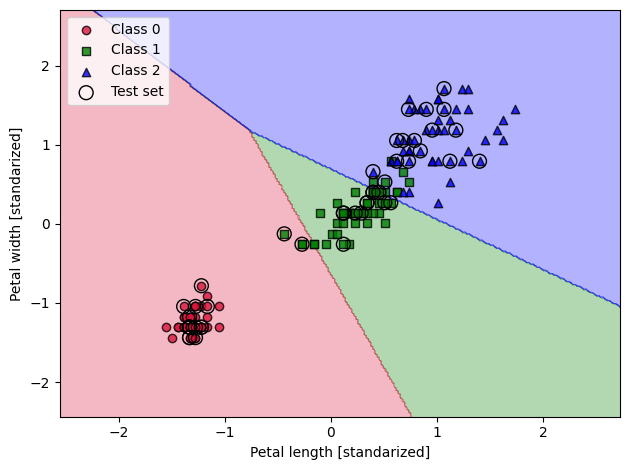

In [6]:
# SGD Alternative version
svm_sgd = SGDClassifier(
    loss='hinge',
    alpha=1/(len(X_train_std)*1),
    random_state=1
)
svm_sgd.fit(X_train_std, y_train)
# model evaluation
plot_decision_boundary(
    X_combined_std,
    y_combined,
    svm_sgd,
    test_idx=range(105, 150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]'
)

## Non-linear

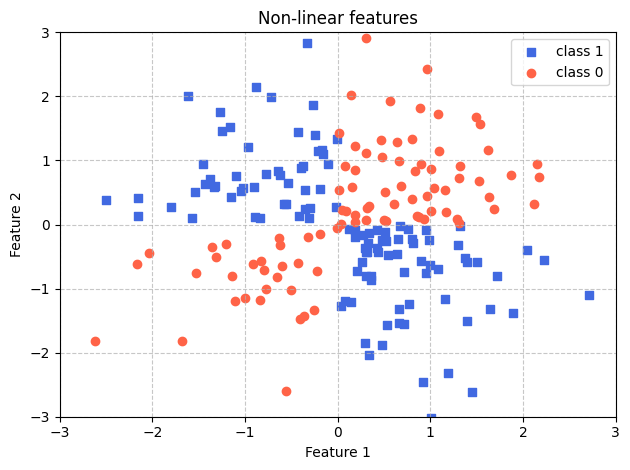

In [15]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(
    X_xor[:, 0] > 0,
    X_xor[:, 1] > 0
)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c='royalblue', marker='s',
    label='class 1'
)
plt.scatter(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    c='tomato', marker='o',
    label='class 0'
)
plt.title('Non-linear features')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(linestyle='--', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()

### SVM Kernel

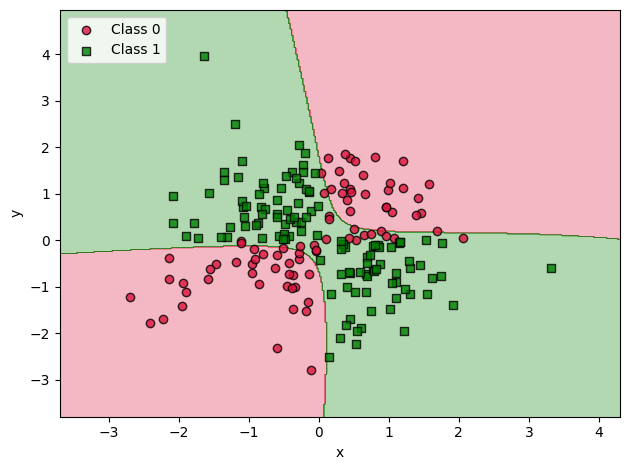

In [10]:
svm = SVC(
    kernel='rbf',
    random_state=1,
    gamma=0.1,
    C=10
)
svm.fit(X_xor, y_xor)
plot_decision_boundary(
    X_xor,
    y_xor,
    svm
)

### Iris-dataset

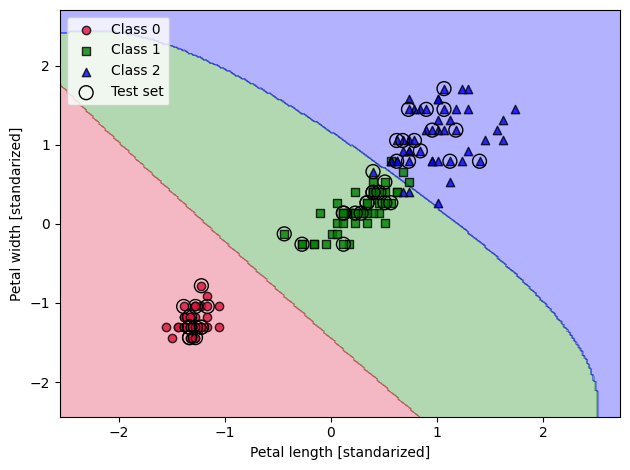

In [12]:
svm2 = SVC(
    kernel='rbf',
    random_state=1,
    gamma=0.2,
    C=1
)
svm2.fit(X_train_std, y_train)
plot_decision_boundary(
    X_combined_std,
    y_combined,
    svm2,
    test_idx=range(105, 150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]'
)

**¿Qué pasa si le modificamos el gamma a un valor mas grande?**

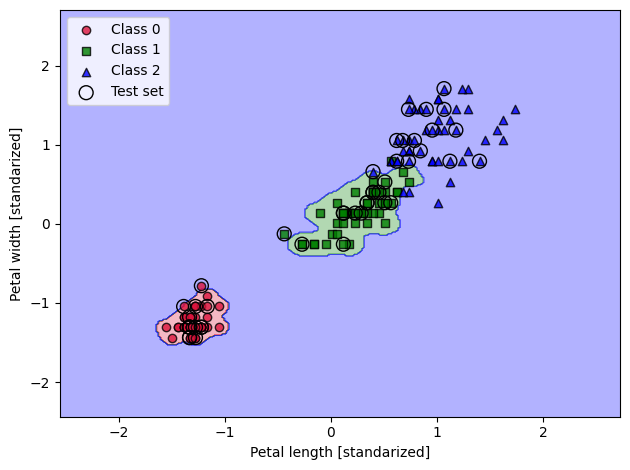

In [13]:
svm3 = SVC(
    kernel='rbf',
    random_state=1,
    gamma=100, # Ahora es 100
    C=1
)
svm3.fit(X_train_std, y_train)
plot_decision_boundary(
    X_combined_std,
    y_combined,
    svm3,
    test_idx=range(105, 150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]'
)

Se vuelve mas ajustada el area con un **gamma** mas grande. Haciendo sonas mas ajustadas para ciertos grupos y para otros ocupando todo el espacio